Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [4]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


Data preperation

In [5]:
df['date']=pd.to_datetime(df['date'])
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [6]:
# sort by value to filter the data
df.sort_values(by=['value'],inplace=True)
df

,date,value
0,2016-05-09,1201
2,2016-05-11,1716
1,2016-05-10,2329
7,2016-05-16,2591
6,2016-05-15,2927
...,...,...
1285,2019-11-15,314101
1184,2019-08-06,337325
1185,2019-08-07,341595
1135,2019-06-18,1166225


In [7]:
# 2.5% of top or bottom is equal to (df['value'].size *2.5/100).__ceil__()
clean_df=df
clean_df.drop((clean_df['value'].head((df['value'].size *2.5/100).__ceil__()).index),inplace=True)
clean_df.drop((clean_df['value'].tail(1+(df['value'].size *2.5/100).__ceil__()).index),inplace=True)
clean_df.value.size


1238

In [8]:
# sort the df on the date
clean_df.sort_values(by=['date'],inplace=True)
df.sort_values(by=['date'],inplace=True)
clean_df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


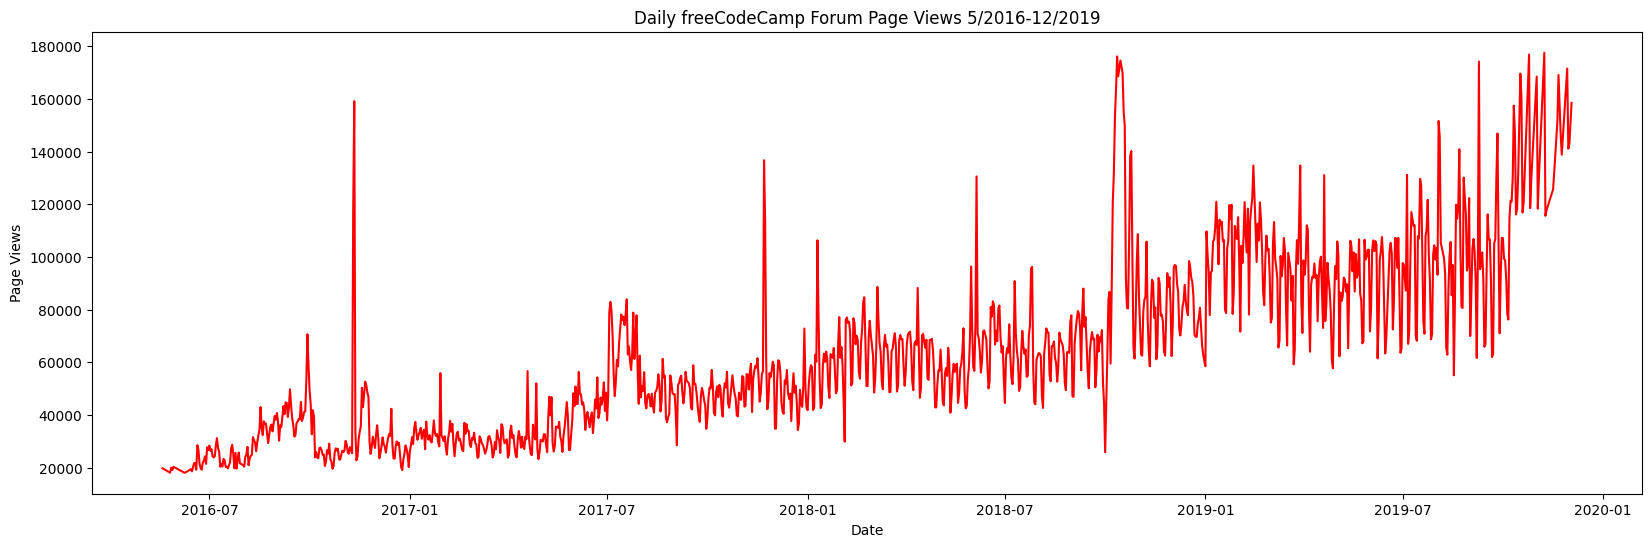

In [9]:
fig=plt.figure(figsize=(20,6))
plt.plot(clean_df['date'],clean_df['value'],'r')
plt.ylabel('Page Views')
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

Bar Plot

In [10]:
bar_df=clean_df

bar_df['YEAR']=clean_df['date'].agg(lambda x:x.year)
bar_df['MONTH']=clean_df['date'].agg(lambda x:x.month)
bar_df['MONTH_NAME']=clean_df['date'].agg(lambda x:x.month_name())
bar_df



C:\Users\ahmed\AppData\Local\Temp\ipykernel_4436\452459828.py:3: FutureWarning: using <function <lambda> at 0x000001FBDB75AD40> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  bar_df['YEAR']=clean_df['date'].agg(lambda x:x.year)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_4436\452459828.py:4: FutureWarning: using <function <lambda> at 0x000001FBDB75ADE0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  bar_df['MONTH']=clean_df['date'].agg(lambda x:x.month)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_4436\452459828.py:5: FutureWarning: using <function <lambda> at 0x000001FBDB75AD40> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  bar_df['MONTH_NAME']=clean_df['date'].agg(lambda x:x.month_name())


,date,value,YEAR,MONTH,MONTH_NAME
10,2016-05-19,19736,2016,5,May
17,2016-05-26,18060,2016,5,May
18,2016-05-27,19997,2016,5,May
19,2016-05-28,19044,2016,5,May
20,2016-05-29,20325,2016,5,May
...,...,...,...,...,...
1294,2019-11-24,138875,2019,11,November
1299,2019-11-29,171584,2019,11,November
1300,2019-11-30,141161,2019,11,November
1301,2019-12-01,142918,2019,12,December


C:\Users\ahmed\AppData\Local\Temp\ipykernel_4436\1156151909.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=bar_df,x='YEAR',y='value',hue='MONTH_NAME',hue_order=hue_o,ci=False,palette='bright',width=0.5)


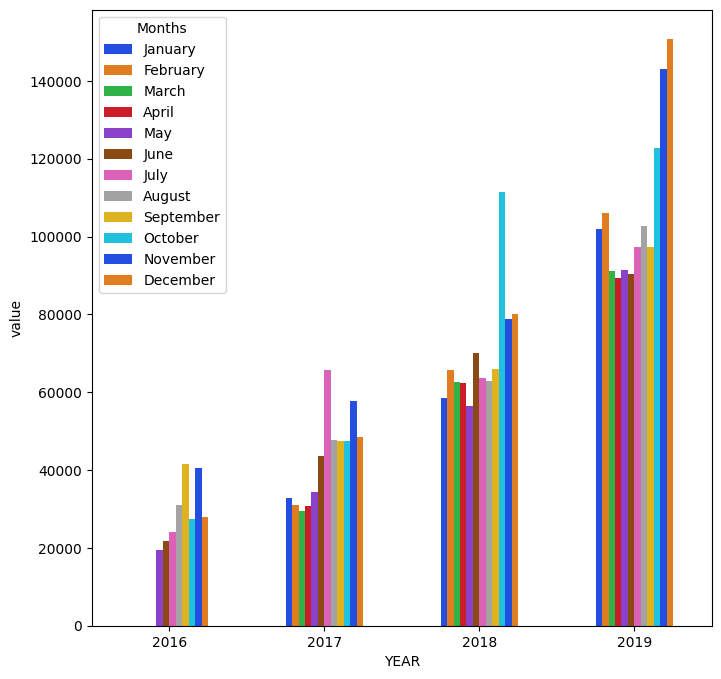

In [11]:
fig=plt.figure(figsize=(8,8))
hue_o=pd.Series(data=bar_df["MONTH_NAME"].unique(),index=bar_df['MONTH'].unique()).sort_index()
sns.barplot(data=bar_df,x='YEAR',y='value',hue='MONTH_NAME',hue_order=hue_o,ci=False,palette='bright',width=0.5)
plt.legend(title='Months')
plt.show()

Box Plot

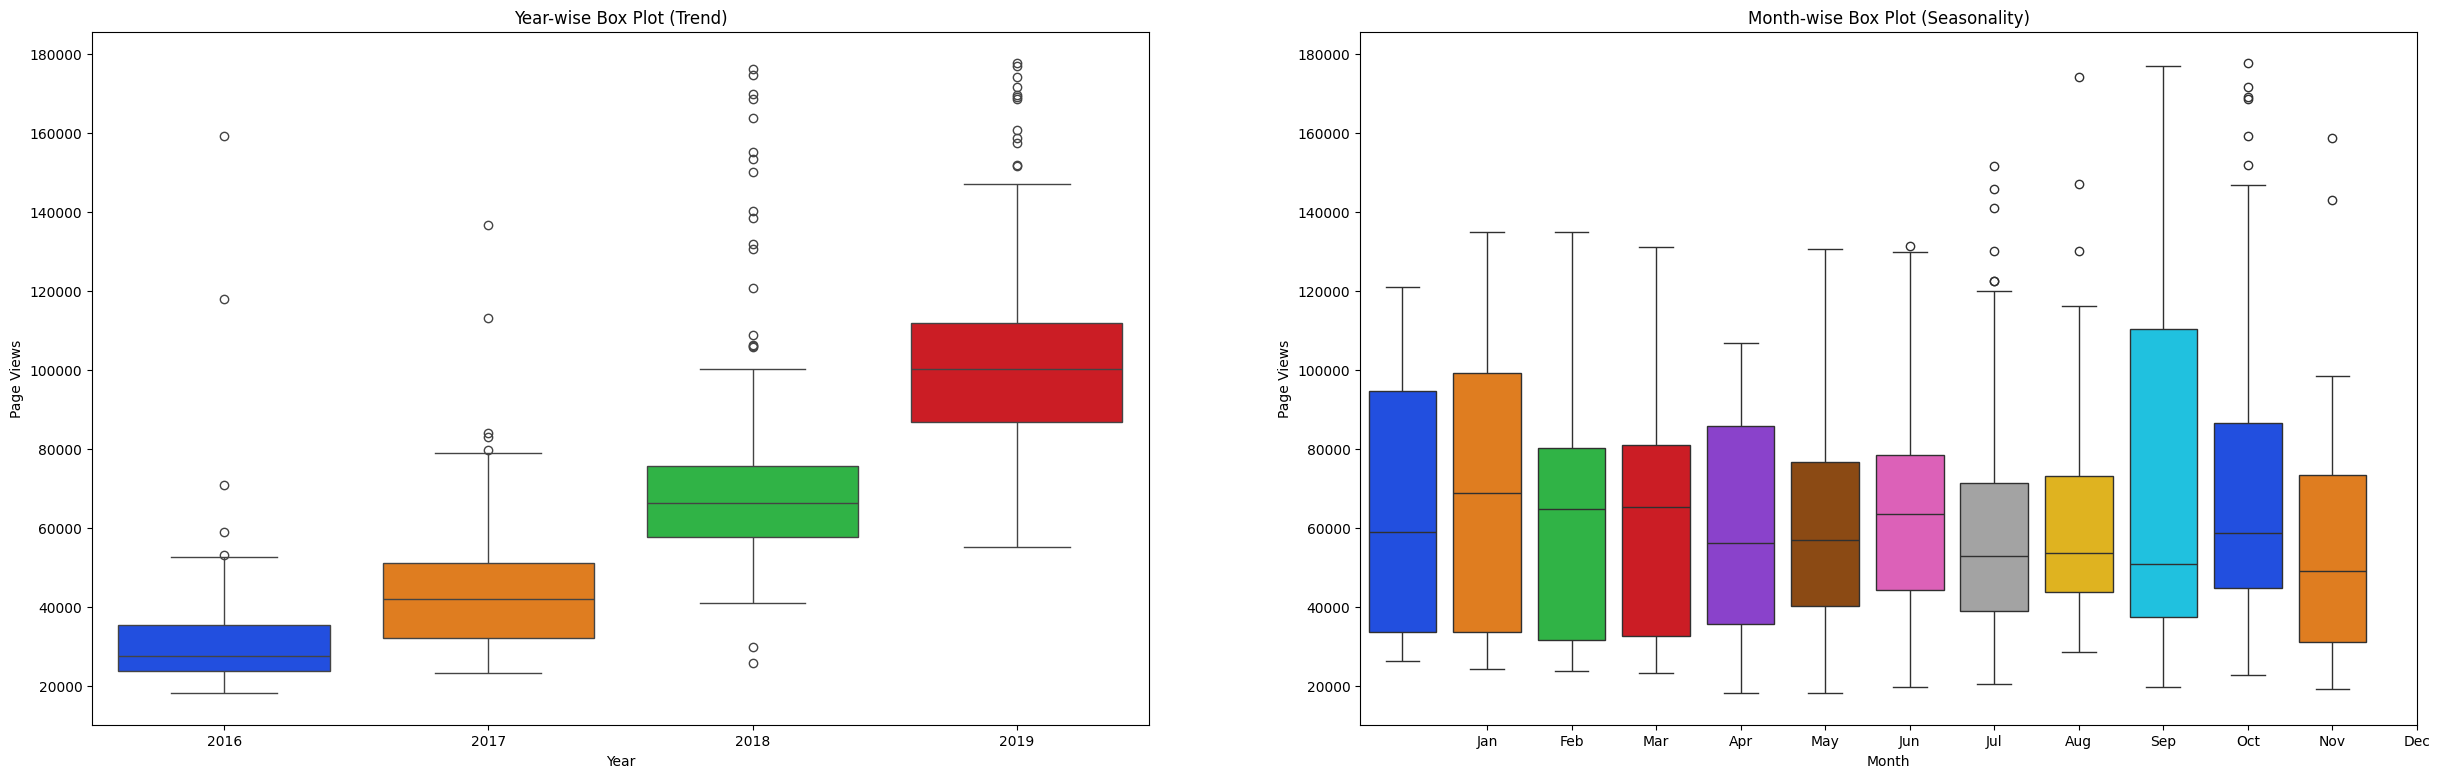

In [12]:
fig ,axes=plt.subplots(1,2,figsize=(30,9))
sns.boxplot(data=bar_df,x='YEAR',y='value',hue='YEAR',palette='bright',legend=False,ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

hue_o=pd.Series(data=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],index=np.arange(1,13))
sns.boxplot(data=bar_df, x='MONTH', y='value', hue='MONTH', palette='bright', legend=False, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
axes[1].set_xticks(hue_o.index)
axes[1].set_xticklabels(hue_o.values)
plt.show()